### ONE HOT ENCODING


In [ ]:
import numpy as np

In [ ]:
# 데이터 로더
# 입력 문장 (모델 입력)
raw_inputs = [
              "나는 학생 입니다",
              "나는 좋은 선생님 입니다",
              "당신은 매우 좋은 선생님 입니다"
]

# 정답 학생(1), 기타(0)
raw_label = [1, 0, 0]

In [ ]:
words = []
for s in raw_inputs:
  words.extend(s.split())

# 중복 단어 제거
words = list(dict.fromkeys(words))
word_to_id = {"[PAD]" : 0, "[UNK]" : 1}
for w in words:
  word_to_id[w] = len(word_to_id)

# 각 번호별 단어
id_to_word = {i : w for w, i in word_to_id.items()}
print(id_to_word)

{0: '[PAD]', 1: '[UNK]', 2: '나는', 3: '학생', 4: '입니다', 5: '좋은', 6: '선생님', 7: '당신은', 8: '매우'}


In [ ]:
train_inputs = []
for s in raw_inputs:
  row = [word_to_id[w] for w in s.split()]
  row += [0] * (5 - len(row))
  train_inputs.append(row)

train_inputs = np.array(train_inputs)
print(train_inputs)

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [ ]:
# one - hot matrix 생성
onehot_matrix = np.eye(len(word_to_id))
print(onehot_matrix)

[[1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [ ]:
train_onehot = onehot_matrix[train_inputs]
print(train_onehot)

[[[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [1. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0.]]]


In [ ]:
print(np.argmax(train_onehot, axis= -1))

[[2 3 4 0 0]
 [2 5 6 4 0]
 [7 8 5 6 4]]


In [ ]:
x = np.argmax(train_onehot, axis= -1)

In [ ]:
import tensorflow as tf
import tensorflow.keras.layers as L

In [ ]:
x_len = train_onehot.shape

In [ ]:
print(x_len)

(3, 5, 9)


In [ ]:
inp = tf.convert_to_tensor(x, dtype = tf.int32)
inp_len = tf.convert_to_tensor(x_len, dtype = tf.int32)

In [ ]:
inp, inp_len

(<tf.Tensor: shape=(3, 5), dtype=int32, numpy=
 array([[2, 3, 4, 0, 0],
        [2, 5, 6, 4, 0],
        [7, 8, 5, 6, 4]], dtype=int32)>,
 <tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 5, 9], dtype=int32)>)

In [ ]:
vocab = 1000
dim = 3
embed = L.Embedding(vocab, dim)

In [ ]:
embed(inp) # 각 문장을 임베딩 레이어로 만든 값

<tf.Tensor: shape=(3, 5, 3), dtype=float32, numpy=
array([[[-0.04186474,  0.0190575 ,  0.02464351],
        [ 0.03210023,  0.04799581, -0.02186363],
        [-0.04253354, -0.03385758,  0.03446037],
        [ 0.0196317 ,  0.03008535,  0.03383261],
        [ 0.0196317 ,  0.03008535,  0.03383261]],

       [[-0.04186474,  0.0190575 ,  0.02464351],
        [-0.02642299, -0.03909228, -0.00488923],
        [-0.02528247,  0.00080882, -0.03345734],
        [-0.04253354, -0.03385758,  0.03446037],
        [ 0.0196317 ,  0.03008535,  0.03383261]],

       [[-0.04705732,  0.04538156,  0.00426603],
        [ 0.04209861,  0.04913023, -0.02803069],
        [-0.02642299, -0.03909228, -0.00488923],
        [-0.02528247,  0.00080882, -0.03345734],
        [-0.04253354, -0.03385758,  0.03446037]]], dtype=float32)>

# word2vec

### abc 뉴스 데이터로 word2vec

In [ ]:
from nltk.corpus import abc
import nltk
nltk.download("abc")
nltk.download("punkt")

[nltk_data] Downloading package abc to /root/nltk_data...
[nltk_data]   Unzipping corpora/abc.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
corpus = abc.sents()

In [ ]:
print(corpus[:3])

[['PM', 'denies', 'knowledge', 'of', 'AWB', 'kickbacks', 'The', 'Prime', 'Minister', 'has', 'denied', 'he', 'knew', 'AWB', 'was', 'paying', 'kickbacks', 'to', 'Iraq', 'despite', 'writing', 'to', 'the', 'wheat', 'exporter', 'asking', 'to', 'be', 'kept', 'fully', 'informed', 'on', 'Iraq', 'wheat', 'sales', '.'], ['Letters', 'from', 'John', 'Howard', 'and', 'Deputy', 'Prime', 'Minister', 'Mark', 'Vaile', 'to', 'AWB', 'have', 'been', 'released', 'by', 'the', 'Cole', 'inquiry', 'into', 'the', 'oil', 'for', 'food', 'program', '.'], ['In', 'one', 'of', 'the', 'letters', 'Mr', 'Howard', 'asks', 'AWB', 'managing', 'director', 'Andrew', 'Lindberg', 'to', 'remain', 'in', 'close', 'contact', 'with', 'the', 'Government', 'on', 'Iraq', 'wheat', 'sales', '.']]


In [ ]:
print("코퍼스의 크기 :", len(corpus))

코퍼스의 크기 : 29059


In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = corpus, 
                 size = 100, window = 5, min_count = 5, workers = 4, 
                 sg = 0) # sg = skipgram or cbow select

In [ ]:
model_result = model.wv.most_similar("man")

In [ ]:
print(model_result)

[('woman', 0.9332447052001953), ('asteroid', 0.920660138130188), ('Bang', 0.9180375337600708), ('third', 0.9165332317352295), ('skull', 0.913234531879425), ('rally', 0.9108709096908569), ('infant', 0.9070101380348206), ('dog', 0.9036200642585754), ('bought', 0.9026771783828735), ('dinosaur', 0.902638852596283)]


In [ ]:
from gensim.models import KeyedVectors
# save
model.wv.save_word2vec_format("./w2v.word2vec")

In [ ]:
loaded_model = KeyedVectors.load_word2vec_format("./w2v.word2vec")
print("done!")

done!


In [ ]:
model_result = model.wv.most_similar("man")

In [ ]:
print(model_result)

[('woman', 0.9332447052001953), ('asteroid', 0.920660138130188), ('Bang', 0.9180375337600708), ('third', 0.9165332317352295), ('skull', 0.913234531879425), ('rally', 0.9108709096908569), ('infant', 0.9070101380348206), ('dog', 0.9036200642585754), ('bought', 0.9026771783828735), ('dinosaur', 0.902638852596283)]


In [ ]:
loaded_model.most_similar("memory")

[('jolt', 0.9708225727081299),
 ('lifting', 0.9695596694946289),
 ('semen', 0.9691586494445801),
 ('springs', 0.9690261483192444),
 ('structures', 0.9685605764389038),
 ('video', 0.9683257341384888),
 ('chasing', 0.9681146144866943),
 ('infection', 0.9679741859436035),
 ('polymer', 0.9672690033912659),
 ('display', 0.9670058488845825)]

### 한국어 word2vec 만들기

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 517 kB/s 
     |████████████████████████████████| 448 kB 47.5 MB/s 


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")

('ratings.txt', <http.client.HTTPMessage at 0x7f71c2743c90>)

In [ ]:
train_data = pd.read_table("ratings.txt")

In [ ]:
train_data.sample(5)

,id,document,label
57701,10024647,옜날껀데 엄청 재밌다 꼭봐라 역시 설명충 코난,1
80556,6134867,한번이면 족하다. 이 영화.,1
198314,1180080,"시미즈레이코의 만화책""비밀"".에서 영향받은거 아냐? 똑같애",0
10778,8554106,진짜 수작! 본지 OO이 지났지만 아직도 짠한 여운이,1
139449,10106029,이래서 캐스팅이 왜 중요한지 한번 더 일깨워주는 드라마!!,0


In [ ]:
print(len(train_data))

200000


In [ ]:
print(train_data.isnull().values.any())

True


In [ ]:
train_data = train_data.dropna(how = "any")
print(train_data.isnull().values.any())

False


In [ ]:
print(len(train_data))

199992


In [ ]:
train_data["document"] = train_data["document"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]", " ")

In [ ]:
train_data.head()

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,디자인을 배우는 학생으로 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...,1
2,4655635,폴리스스토리 시리즈는 부터 뉴까지 버릴께 하나도 없음 최고,1
3,9251303,와 연기가 진짜 개쩔구나 지루할거라고 생각했는데 몰입해서 봤다 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [56]:
okt = Okt()
tokenized_data = []

for sentence in train_data["document"]:
  temp_x = okt.morphs(sentence, stem = True) # tokenization
  temp_x = [word for word in temp_x if not word in stopwords] # 불용어 제거
  tokenized_data.append(temp_x)

In [61]:
# 리뷰 길이 분포 확인
print("maxlen :", max(len(l) for l in tokenized_data))
print("meanlen :", sum(map(len, tokenized_data)) / len(tokenized_data))

maxlen : 73
meanlen : 10.732819312772511


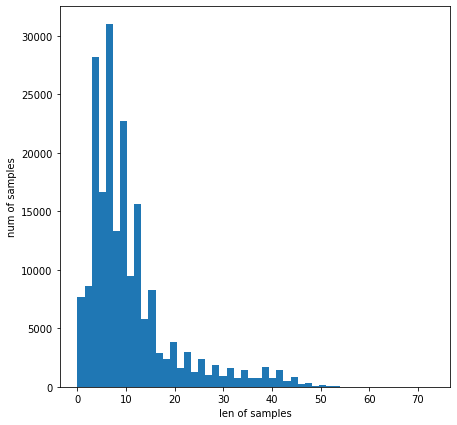

In [65]:
plt.figure(figsize = (7, 7))
plt.hist([len(s) for s in tokenized_data], bins = 50)
plt.xlabel("len of samples")
plt.ylabel("num of samples")
plt.show()

In [67]:
from gensim.models import Word2Vec
model = Word2Vec(sentences = tokenized_data, 
                 size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [68]:
model.wv.vectors.shape

(16386, 100)

In [69]:
model.wv.most_similar("최민식")

[('김명민', 0.8734389543533325),
 ('한석규', 0.8707730770111084),
 ('설경구', 0.8706140518188477),
 ('이정재', 0.8610110282897949),
 ('주진모', 0.8515526056289673),
 ('박중훈', 0.8499312996864319),
 ('송강호', 0.8446161150932312),
 ('유다인', 0.8397061228752136),
 ('안성기', 0.8373467922210693),
 ('김수로', 0.8365139365196228)]

# 사전 훈련된 워드 임베딩 (한국어)

In [75]:
import gensim
model = gensim.models.Word2Vec.load("/content/drive/MyDrive/Colab Notebooks/ko.bin")

In [84]:
result = model.wv.most_similar("사과", topn = 20)
result

[('사죄', 0.5442899465560913),
 ('충고', 0.4946415424346924),
 ('질문', 0.48838865756988525),
 ('해명', 0.48268449306488037),
 ('대답', 0.4778830409049988),
 ('선처', 0.4665257930755615),
 ('질타', 0.4546084403991699),
 ('발언', 0.4542806148529053),
 ('회답', 0.45340797305107117),
 ('고소', 0.45193421840667725),
 ('모욕', 0.4512495994567871),
 ('애도', 0.44673261046409607),
 ('건네', 0.4462088942527771),
 ('거짓말', 0.44542258977890015),
 ('규탄', 0.43931901454925537),
 ('고발', 0.43652278184890747),
 ('애원', 0.4359186291694641),
 ('대접', 0.435674786567688),
 ('경고', 0.43491846323013306),
 ('비난', 0.4336814880371094)]

# 사전 훈련된 워드 임베딩 (영어)

In [1]:
import gensim
model = gensim.models.KeyedVectors.load_word2vec_format("/content/drive/MyDrive/GoogleNews-vectors-negative300.bin.gz", binary = True)

In [2]:
model.vectors.shape

(3000000, 300)

In [3]:
print(model.similarity("this", "is"))
print(model.similarity("post", "book"))

0.40797037
0.057204384


In [4]:
print(model["book"]) # 300차원

[ 0.11279297 -0.02612305 -0.04492188  0.06982422  0.140625    0.03039551
 -0.04370117  0.24511719  0.08740234 -0.05053711  0.23144531 -0.07470703
  0.21875     0.03466797 -0.14550781  0.05761719  0.00671387 -0.00701904
  0.13183594 -0.25390625  0.14355469 -0.140625   -0.03564453 -0.21289062
 -0.24804688  0.04980469 -0.09082031  0.14453125  0.05712891 -0.10400391
 -0.19628906 -0.20507812 -0.27539062  0.03063965  0.20117188  0.17382812
  0.09130859 -0.10107422  0.22851562 -0.04077148  0.02709961 -0.00106049
  0.02709961  0.34179688 -0.13183594 -0.078125    0.02197266 -0.18847656
 -0.17480469 -0.05566406 -0.20898438  0.04858398 -0.07617188 -0.15625
 -0.05419922  0.01672363 -0.02722168 -0.11132812 -0.03588867 -0.18359375
  0.28710938  0.01757812  0.02185059 -0.05664062 -0.01251221  0.01708984
 -0.21777344 -0.06787109  0.04711914 -0.00668335  0.08544922 -0.02209473
  0.31835938  0.01794434 -0.02246094 -0.03051758 -0.09570312  0.24414062
  0.20507812  0.05419922  0.29101562  0.03637695  0.04

In [5]:
model.most_similar("memory")

[('Memory', 0.6844282150268555),
 ('memories', 0.6138081550598145),
 ('Added_Tarbet', 0.5560144186019897),
 ('Earliest_sporting', 0.5375796556472778),
 ('Flash_memory', 0.5318928360939026),
 ('foam_mattress_topper', 0.5253582000732422),
 ('flash_memory', 0.5221431255340576),
 ('remembering', 0.5171269178390503),
 ('SODIMM_modules', 0.5119421482086182),
 ('components_microprocessors_CPUs', 0.5007408857345581)]

# 위키피디아 Data Word2Vec

In [6]:
!pip install wikiextractor

     |████████████████████████████████| 46 kB 4.4 MB/s 


In [7]:
# Colab에 Mecab 설치
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh
%cd ../

Cloning into 'Mecab-ko-for-Google-Colab'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 109 (delta 7), reused 10 (delta 3), pack-reused 91
Receiving objects: 100% (109/109), 1.27 MiB | 13.54 MiB/s, done.
Resolving deltas: 100% (46/46), done.
/content/Mecab-ko-for-Google-Colab
Installing konlpy.....
     |████████████████████████████████| 19.4 MB 22.1 MB/s 
     |████████████████████████████████| 448 kB 26.0 MB/s 
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2022-01-25 06:37:04--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
Resolving bitbucket.org (bitbucket.org)... 104.192.141.1, 2406:da00:ff00::22e9:9f55, 2406:da00:ff00::22cd:e0db, ...
Connecting to bitbucket.org (bitbucket.org)|104.192.141.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Lo

In [8]:
!wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2

--2022-01-25 06:41:31--  https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 812234750 (775M) [application/octet-stream]
Saving to: ‘kowiki-latest-pages-articles.xml.bz2’

kowiki-latest-pages 100%[===================>] 774.61M  4.23MB/s    in 3m 0s   

2022-01-25 06:44:31 (4.31 MB/s) - ‘kowiki-latest-pages-articles.xml.bz2’ saved [812234750/812234750]



In [9]:
!python -m wikiextractor.WikiExtractor kowiki-latest-pages-articles.xml.bz2

INFO: Preprocessing 'kowiki-latest-pages-articles.xml.bz2' to collect template definitions: this may take some time.
INFO: Preprocessed 100000 pages
INFO: Preprocessed 200000 pages
INFO: Preprocessed 300000 pages
INFO: Preprocessed 400000 pages
INFO: Preprocessed 500000 pages
INFO: Preprocessed 600000 pages
INFO: Preprocessed 700000 pages
INFO: Preprocessed 800000 pages
INFO: Preprocessed 900000 pages
INFO: Preprocessed 1000000 pages
INFO: Preprocessed 1100000 pages
INFO: Preprocessed 1200000 pages
INFO: Preprocessed 1300000 pages
INFO: Preprocessed 1400000 pages
INFO: Preprocessed 1500000 pages
INFO: Preprocessed 1600000 pages
INFO: Loaded 58531 templates in 232.3s
INFO: Starting page extraction from kowiki-latest-pages-articles.xml.bz2.
INFO: Using 1 extract processes.
INFO: Extracted 100000 articles (964.5 art/s)
INFO: Extracted 200000 articles (1330.7 art/s)
INFO: Extracted 300000 articles (1491.3 art/s)
INFO: Extracted 400000 articles (1587.2 art/s)
INFO: Extracted 500000 articles

In [12]:
import os
import re

In [13]:
os.listdir("text")

['AG', 'AH', 'AC', 'AI', 'AE', 'AA', 'AD', 'AB', 'AF']

In [14]:
# wiki 숫자 형태의 수많은 파일들을 하나로 통합하는 과정
# AA~AF 디렉토리 안의 모든 파일들의 경로를 파이썬에 리스트 형태로 저장

def list_wiki(dirname):
  filepaths = []
  filenames = os.listdir(dirname)
  for filename in filenames:
    filepath = os.path.join(dirname, filename)
    if os.path.isdir(filepath):
      filepaths.extend(list_wiki(filepath))
    else:
      find = re.findall(r"wiki_[0-9][0-9]", filepath)
      if 0 < len(find):
        filepaths.append(filepath)
  return sorted(filepaths)

In [15]:
filepaths = list_wiki("text")

In [16]:
len(filepaths)

871

In [17]:
# 파일 전부를 하나로 합침
with open("output_file.txt", "w") as outfile:
  for filename in filepaths:
    with open(filename) as infile:
      contents = infile.read()
      outfile.write(contents)

In [20]:
f = open("./output_file.txt", encoding = "utf8")
i = 0
while 1:
  line = f.readline()
  if line != "\n":
    i += 1
    print("%d번째 줄 :" % i + line)
  
  if i == 10:
    break

f.close()

1번째 줄 :<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">

2번째 줄 :지미 카터

3번째 줄 :제임스 얼 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39대 대통령 (1977년 ~ 1981년)이며, 독재자의 사신이라는 별명을 가지고 있다.

4번째 줄 :생애.

5번째 줄 :어린 시절.

6번째 줄 :지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.

7번째 줄 :조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.

8번째 줄 :정계 입문.

9번째 줄 :1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주지사 선거에 낙선하지만, 1970년 조지아 주지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.

10번째 줄 :대통령 재임.



### 2. 형태소 분석

In [1]:
from tqdm import tqdm
from konlpy.tag import Mecab

In [2]:
mecab = Mecab()

In [3]:
# output_file에 총 몇줄이 있는지 확인
f = open("output_file.txt", encoding = "utf8")
lines = f.read().splitlines()
len(lines)

9982393

In [4]:
lines[:10]

['<doc id="5" url="https://ko.wikipedia.org/wiki?curid=5" title="지미 카터">',
 '지미 카터',
 '',
 '제임스 얼 카터 주니어(, 1924년 10월 1일 ~ )는 민주당 출신 미국 39대 대통령 (1977년 ~ 1981년)이며, 독재자의 사신이라는 별명을 가지고 있다.',
 '생애.',
 '어린 시절.',
 '지미 카터는 조지아주 섬터 카운티 플레인스 마을에서 태어났다.',
 '조지아 공과대학교를 졸업하였다. 그 후 해군에 들어가 전함·원자력·잠수함의 승무원으로 일하였다. 1953년 미국 해군 대위로 예편하였고 이후 땅콩·면화 등을 가꿔 많은 돈을 벌었다. 그의 별명이 "땅콩 농부" (Peanut Farmer)로 알려졌다.',
 '정계 입문.',
 '1962년 조지아 주 상원 의원 선거에서 낙선하나 그 선거가 부정선거 였음을 입증하게 되어 당선되고, 1966년 조지아 주지사 선거에 낙선하지만, 1970년 조지아 주지사를 역임했다. 대통령이 되기 전 조지아주 상원의원을 두번 연임했으며, 1971년부터 1975년까지 조지아 지사로 근무했다. 조지아 주지사로 지내면서, 미국에 사는 흑인 등용법을 내세웠다.']

In [ ]:
# 빈 문자열을 제외하고 형태소 분석을 진행
result = []

for line in tqdm(lines):
  # 빈 문자열이 아닌 경우에만 수행
  if line:
    result.append(mecab.morphs(line))

 49%|████▉     | 4938012/9982393 [15:18<468:04:57,  2.99it/s]

### Word2Vec 학습

In [ ]:
from gensim.models import Word2Vec
model = Word2Vec(result, size=100, window=5, min_count=5, workers=4, sg=0)

In [ ]:
model_result1 = model.wv.most_similar("대한민국")
print(model_result1)